In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_number(X):
    plt.imshow(1-X.reshape((16, 16)), cmap='gray')

# Exercise 1: 

## (a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot thepoint cloud of the data set highlighting each class.

### Load and clean the dataset

In [3]:
path_to_train = 'zip.train'
path_to_test = 'zip.test'
training_data_df =pd.read_csv(path_to_train, sep=' ', header=None)
test_data_df = pd.read_csv(path_to_test, sep =' ',header=None)

In [11]:
# look at the train dataset
training_data_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,3.0,-1.0,-1.0,-1.0,-0.988,-0.527,-0.208,0.620,1.000,0.467,...,-0.116,0.899,0.416,-0.510,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7287,3.0,-1.0,-1.0,-1.0,-0.990,0.708,0.557,0.347,-0.107,-0.758,...,0.697,0.636,0.167,-0.968,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7288,3.0,-1.0,-1.0,-1.0,-0.783,-0.984,-0.827,0.068,1.000,1.000,...,0.805,1.000,1.000,0.727,-0.342,-0.933,-1.000,-1.000,-1.000,-1.0
7289,0.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.549,0.463,0.999,0.999,...,-0.231,0.621,0.999,-0.042,-0.231,-0.687,-1.000,-1.000,-1.000,-1.0


In [5]:
# drop the NaN column that is not present in the testing set
training_data_df.drop(257,axis=1,inplace=True)

In [40]:
# look at the test dataset
test_data_df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.000,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.700,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.417,0.814,1.000,0.775,...,1.000,1.000,0.554,0.184,-0.484,-1.000,-1.0,-1.0,-1.0,-1.0
2003,9,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.855,0.209,0.941,...,-1.000,0.319,1.000,0.056,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2004,4,-1.0,-1.0,-1.0,-1.000,-0.031,0.752,-0.431,-1.000,-1.000,...,1.000,0.928,-0.393,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2005,0,-1.0,-1.0,-1.0,-1.000,-0.534,0.578,1.000,0.301,-0.328,...,1.000,0.430,0.200,-0.061,-0.975,-1.000,-1.0,-1.0,-1.0,-1.0


In [34]:
# define X and y
# training_data = np.array(training_data_df)
# test_data = np.array(test_data_df)
training_data = np.array(training_data_df[(training_data_df[0] == 0) | (training_data_df[0] == 1)])
test_data = np.array(test_data_df[(test_data_df[0] == 0) | (test_data_df[0] == 1)])
X_train, y_train = training_data[:,1:], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

### Implement the Oja algorithm

In [14]:
class oja_pca:
    def __init__(self, eps=1e-8, max_iter=10000, random_state=42):
        self.eps = eps
        self.max_iter = max_iter
        self.random_state = random_state
        self.w_matrix = None
    
    def oja(self, X):
        """A funcion that implements Oja's algorithm to find the vector w that explains the most variance of input X"""
        # initialise vector w
        np.random.seed(self.random_state)
        w = np.random.uniform(size=(X.shape[1], 1))
        w = w / np.linalg.norm(w, ord=2)
        for i in range(1, self.max_iter):
            # set the learning rate as lr(t)=1/t where t is the current iteration step
            gamma_learning_rate = 1/i
            # Pick a random x
            random_index = np.random.randint(X.shape[0])
            chosen_x = X[random_index, :].reshape((X.shape[1], 1))
            # update w
            w_last = w
            wT_dot_X = w.T @ chosen_x
            w += gamma_learning_rate * wT_dot_X * (chosen_x - wT_dot_X * w)
            # normalize w
            w = w / np.linalg.norm(w, ord=2)
            # check epsilon threshold
            if np.linalg.norm(w_last - w) < self.eps:
                break
        return w
    
    def pca_fit(self, X, num_pc):
        """A function to loop over Oja's algorithm for the in num_pc dedicated number of components"""
        # create a list to store w vectors
        w_matrix = []
        # center the data
        X_new = X - np.mean(X, axis=0) #.values
        for d in range(num_pc):
            w = self.oja(X_new)
            # update the x with one component removed 
            X_new = X_new - (w.T @ X_new.T).T @ w.T
            w_matrix.append(w.flatten())
        w_matrix = np.array(w_matrix).T
        self.w_matrix = w_matrix
        X_pca = X @ w_matrix
        return X_pca
    
    def pca_transform(self, X):
        """A function to transform another dataset with previously set w"""
        if self.w_matrix is None:
            return None
        X_pca = X @ self.w_matrix
        return X_pca

### Get 2 Principal Components and w vectors from the training dataset

In [15]:
OJA = oja_pca()
X_features_2PCs = OJA.pca_fit(X_train, 2)
w_2PCs = OJA.w_matrix
X_features_2PCs

array([[10.81095005,  0.49956905],
       [-2.55675762,  4.83218473],
       [10.31231475,  0.76024768],
       ...,
       [11.09420378, -0.20368455],
       [-6.99961917, -3.55928568],
       [ 9.85032001, -3.18068536]])

### Visualize the two PCs

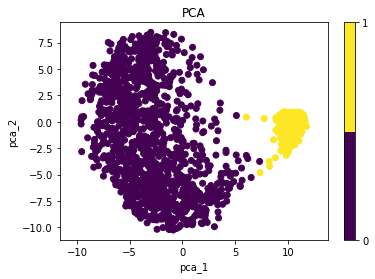

In [16]:
labs_int = y_train.astype(int)
plt.scatter(X_features_2PCs[:, 0], X_features_2PCs[:, 1], c = labs_int, cmap=plt.get_cmap('viridis',len(set(y_train))))
plt.colorbar(ticks=np.arange(0,len(set(labs_int))))
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('PCA')
plt.axis('equal')
plt.show()

### Visualize the two w vectors

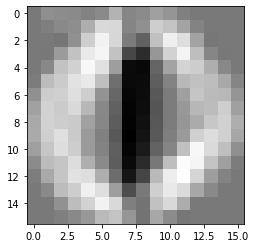

In [17]:
# first w vector
show_number(w_2PCs[:, 0])

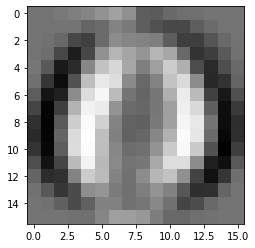

In [18]:
# second w vector
show_number(w_2PCs[:, 1])

# Exercise 1: 

## (b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on the two-dimensional dataset.

In [19]:
class KNearestNeighbors:
    def squared_euclidean_distance(self, x_1, x_2):
      '''
      np.sum(x, axis = 1) will be summing all elements over the pixel dimension (axis = 1)
      '''
      return np.sum((x_1-x_2)**2, axis = 1)

    def __init__(self, k): 
        self.k = k
    
    def get_neighbourhood(self, X_train, X_test_set):
        """
        Get all pairwise distances.
        """
        return self.squared_euclidean_distance(X_train, X_test_set)
    
    def get_k_smallest_distances(self, distances):
        """
        Return the k closest data points in input distance list.
        """
        enumerated = list(enumerate(distances))
        index_sorted = sorted(enumerated, key=lambda x:x[1])
        return [index_sorted[i][0] for i in range(self.k)]
    
    def get_majority_voted_y_label(self, Y_train, k_smallest_pos):
        """
        Determine label by getting majority vote of k nearest labels.
        """
        selected_labels = np.array([int(Y_train[i]) for i in k_smallest_pos])
        return np.argmax(np.bincount(selected_labels))
                
    def classify_single(self, X_train, Y_train, X_test_set):
        """
        Label one query data point using kNN.
        """
        distances = self.get_neighbourhood(X_train, X_test_set)
        k_smallest_pos = self.get_k_smallest_distances(distances)
        return self.get_majority_voted_y_label(Y_train, k_smallest_pos)
        
    def classify_loop(self, X_train, Y_train, X_test):
        """
        Classify all instances in test set.
        """
        return [self.classify_single(X_train, Y_train, X_test_set) for X_test_set in X_test] 
    
    def calculate_accuracy(self, true_y, pred_y, classes):
        """
        Calculate accuracy for a classified set.
        """
        class_sum = 0
        for class_num in classes:
            val_sum = 0
            for true_val, pred_val in zip(true_y, pred_y): 
                if class_num == true_val:
                    if true_val == pred_val:
                        val_sum += 1
            class_sum += val_sum
        return class_sum / len(true_y)

def cross_validation(X_train, y_train, Ks, nr_folds = 5):
    """
    Split training data (X_train, y_train) into nr_folds many folds of 80% training and 20% validation set.
    Train and evaluate len(Ks) many kNN classifiers on each fold using different neighborhood sizes k. 
    Return accuracies.
    """
    all_accuracies = []
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    fold_indices_list = np.array_split(indices, nr_folds)
    for fold_counter, val_indices in enumerate(fold_indices_list):
        X_val = X_train[val_indices]
        y_val = y_train[val_indices]
        X_training = np.delete(X_train, val_indices, 0)
        y_training = np.delete(y_train, val_indices, 0)
        accuracy_list = []
        for k in Ks:
            kNN = KNearestNeighbors(k)
            y_pred = kNN.classify_loop(X_training, y_training, X_val)
            accuracy_list += [kNN.calculate_accuracy(y_val, y_pred, list(range(2)))]
        all_accuracies += [accuracy_list]
    return(np.array(all_accuracies))

### Cross validate the training set to get k

In [20]:
Ks = range(2,10)
nr_folds = 5
acc = cross_validation(X_features_2PCs, y_train, Ks, nr_folds)

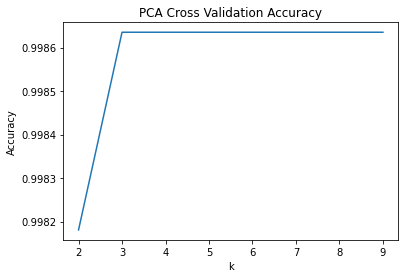

In [22]:
plt.plot(Ks, np.mean(acc.T, axis=1))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('PCA Cross Validation Accuracy')
plt.show()

### Get the accuracy of the test set using the same w vector

In [37]:
# convert the training set using a new w vector
X_test_2PCs = OJA.pca_transform(X_test)
# choose k = 3
kNN_test = KNearestNeighbors(3)
y_pred = kNN_test.classify_loop(X_features_2PCs, y_train, X_test_2PCs)
accuracy_2PCs = kNN_test.calculate_accuracy(y_test, y_pred, [1, 0])
print("PC test Classification Accuracy is: ", accuracy_2PCs)

PC test Classification Accuracy is:  0.9935794542536116


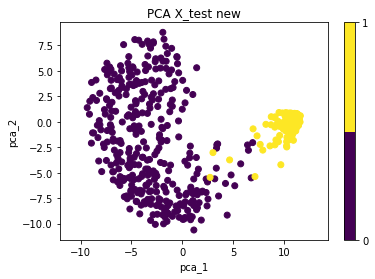

In [39]:
labs_int_test = y_test.astype(int)
plt.scatter(X_test_2PCs[:, 0], X_test_2PCs[:, 1], c = labs_int_test, cmap=plt.get_cmap('viridis',len(set(y_test))))
plt.colorbar(ticks=np.arange(0,len(set(labs_int_test))))
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('PCA X_test new')
plt.axis('equal')
plt.show()

### Get the accuracy of the test set, but fitting it to a new PCA w vector

In [40]:
# convert the training set using the same w vector
OJA_test = oja_pca()
X_test_2PCs_new = OJA_test.pca_fit(X_test, 2)
# choose k = 3
kNN_test_new = KNearestNeighbors(3)
y_pred_new = kNN_test_new.classify_loop(X_features_2PCs, y_train, X_test_2PCs_new)
accuracy_2PCs_new = kNN_test.calculate_accuracy(y_test, y_pred_new, [1, 0])
print("new PCs Classification Accuracy is: ", accuracy_2PCs_new)

new PCs Classification Accuracy is:  0.5008025682182986


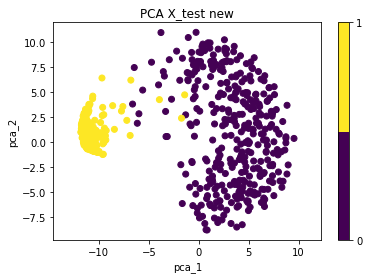

In [41]:
labs_int_test_new = y_test.astype(int)
plt.scatter(X_test_2PCs_new[:, 0], X_test_2PCs_new[:, 1], c = labs_int_test_new, cmap=plt.get_cmap('viridis',len(set(y_train))))
plt.colorbar(ticks=np.arange(0,len(set(labs_int_test_new))))
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('PCA X_test new')
plt.axis('equal')
plt.show()

# Exercise 2: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset.
<br>Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37
(5,)


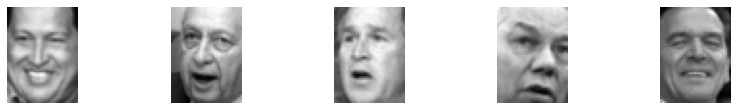

In [47]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_faces = lfw_people.data
n_features = X_faces.shape[1]

# the label to predict is the id of the person
y_faces = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_faces(X):
    num_samples = 5
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = sample_digits[i].reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_faces(X)

In [48]:
np.unique(y_faces)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [54]:
# shape of the image h*w = 50*37 = 1850
X_faces.shape

(1288, 1850)

### Visualize the 2 PCs

In [63]:
def show_face(X):
    fig = plt.figure(figsize=(20, 6))
    img = X.reshape((h, w))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [58]:
OJA_faces = oja_pca()
X_faces_2PCs = OJA_faces.pca_fit(X_faces, 2)
w_faces_2PCs = OJA_faces.w_matrix
# X_faces_2PCs

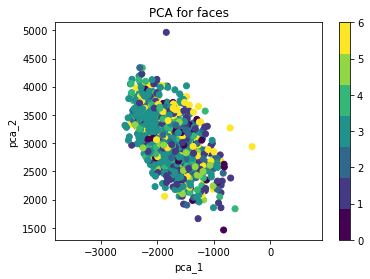

In [67]:
labs_int_faces = y_faces.astype(int)
plt.scatter(X_faces_2PCs[:, 0], X_faces_2PCs[:, 1], c = labs_int_faces, cmap=plt.get_cmap('viridis',len(set(y_faces))))
plt.colorbar(ticks=np.arange(0,len(set(labs_int_faces))))
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('PCA for faces')
plt.axis('equal')
plt.show()

### Visualize the w vectors / eigenfaces

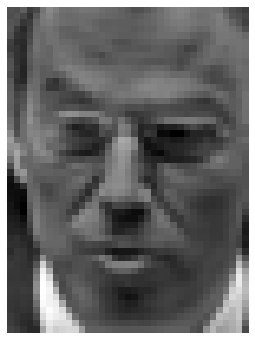

In [64]:
# first w vector
show_face(w_faces_2PCs[:, 0])

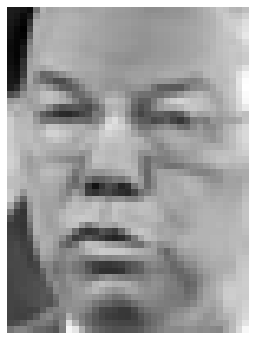

In [65]:
# first w vector
show_face(w_faces_2PCs[:, 1])